In [1]:
##Import Libraries and Load Data##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#df = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with your file path
df = pd.read_csv (r'/Users/ballu_macbookpro/Downloads/titanic.csv', sep=',')

In [2]:
#Basic Dataset Overview#
print("Shape of the dataset:", df.shape)
print("Data types:\n", df.dtypes)



Shape of the dataset: (891, 12)
Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
##Display First Few Rows##
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
Check for Missing Values

print("Missing values per column:\n", df.isnull().sum())

SyntaxError: invalid syntax (<ipython-input-7-966e0a3b140a>, line 1)

In [10]:
##Summary Statistics##

df.describe(include='all')  # Shows statistics for both numerical and categorical columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Scanlan, Mr. James",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


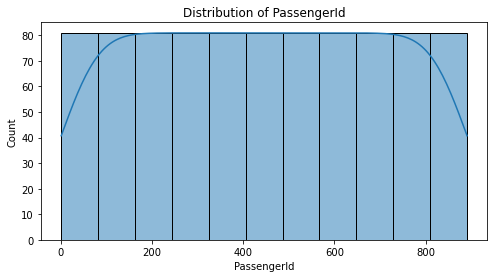

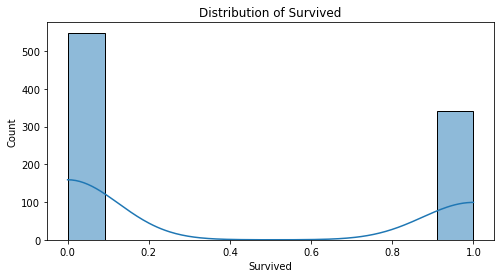

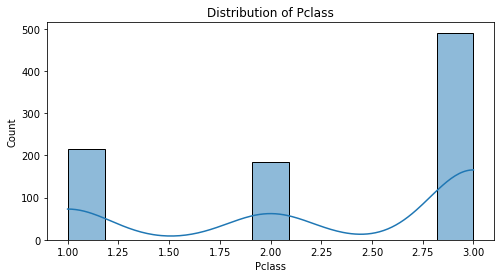

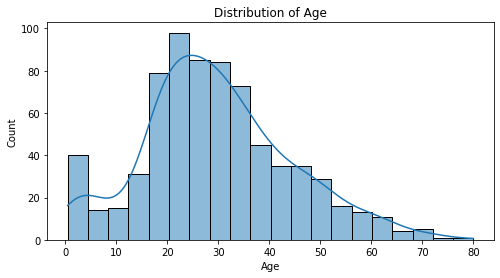

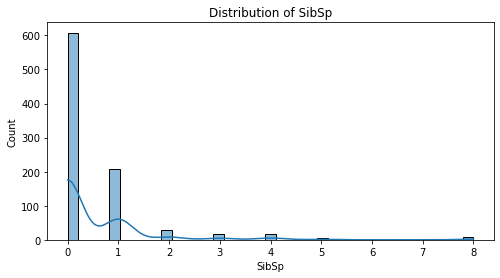

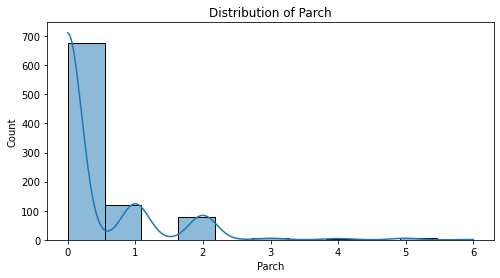

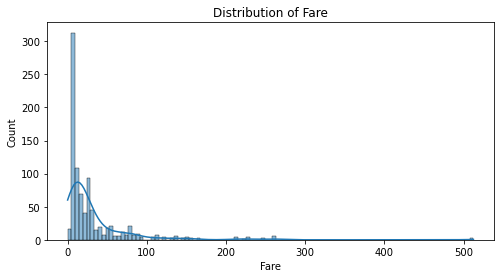

In [11]:
#Univariate Analysis#

##Distribution of Numerical Features##

numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


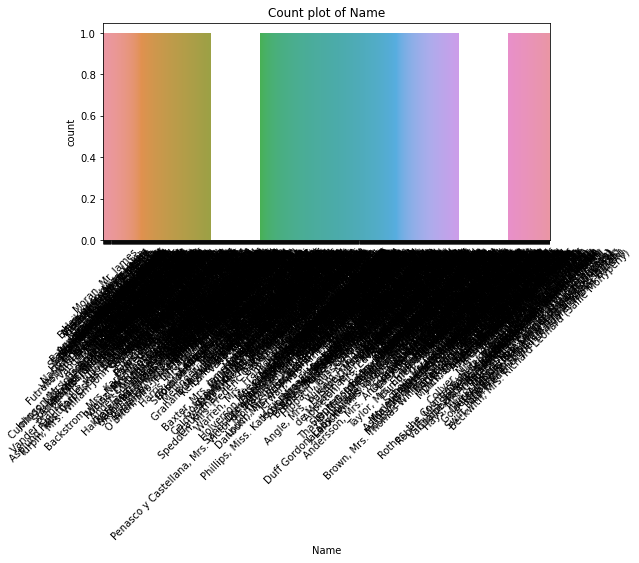

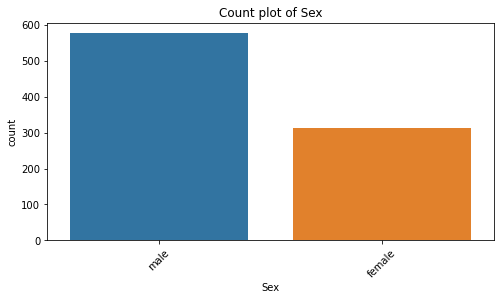

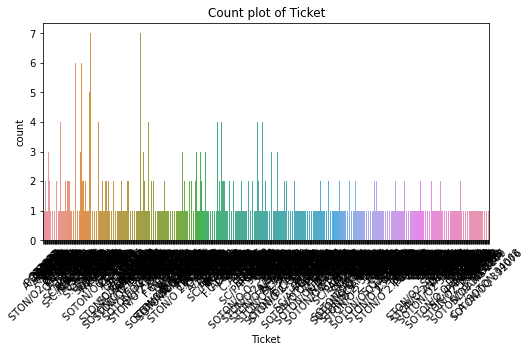

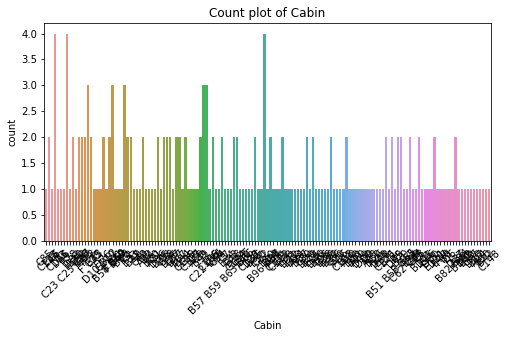

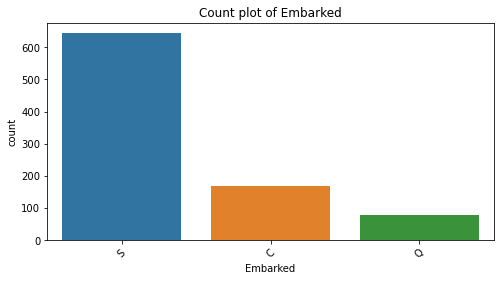

In [12]:
#Distribution of Categorical Features#

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


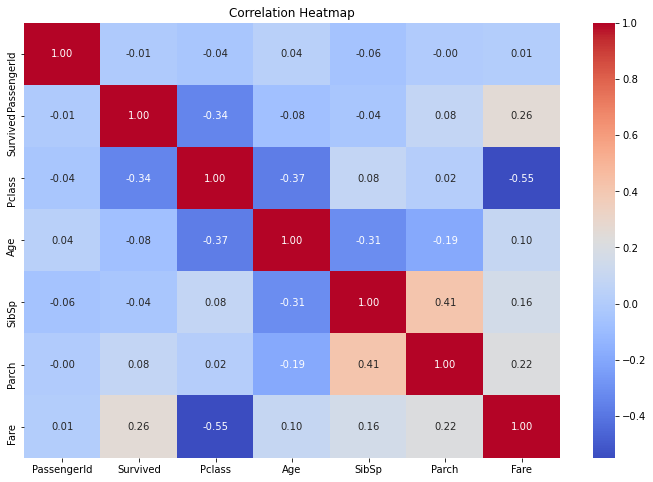

In [15]:
#Bivariate Analysis#

##Numerical vs Numerical (Correlation Heatmap)##

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


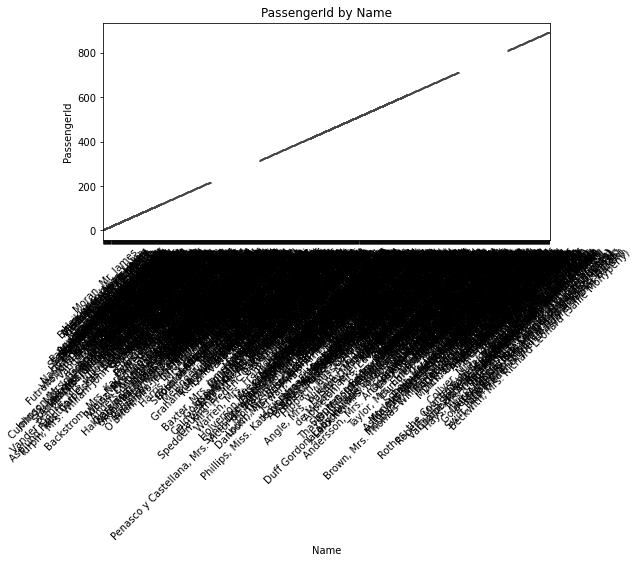

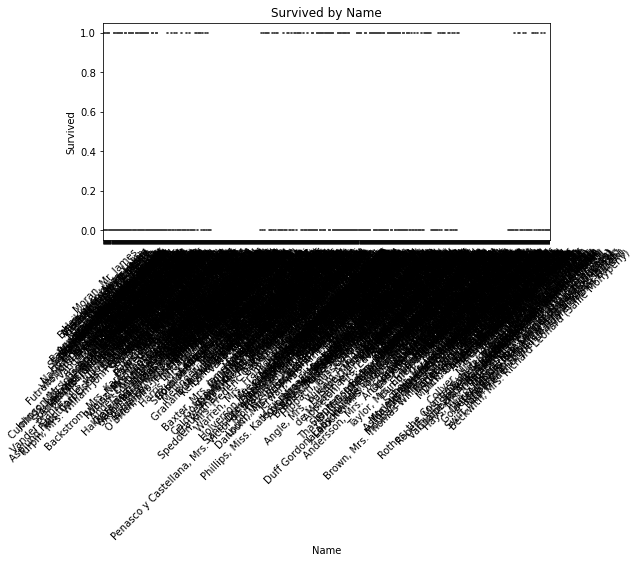

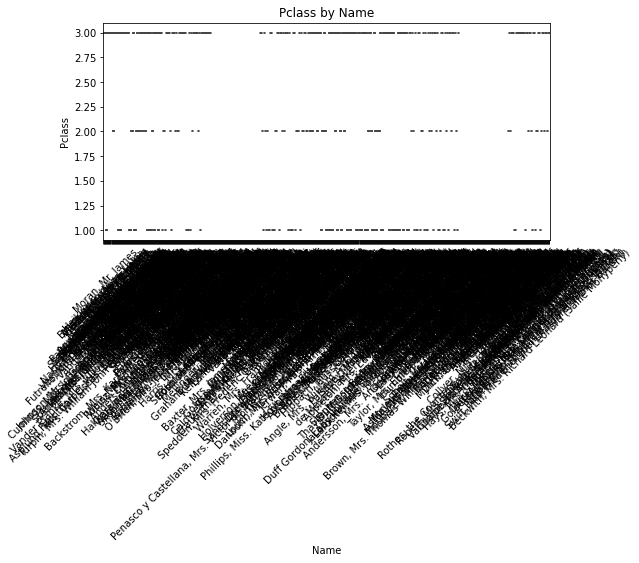

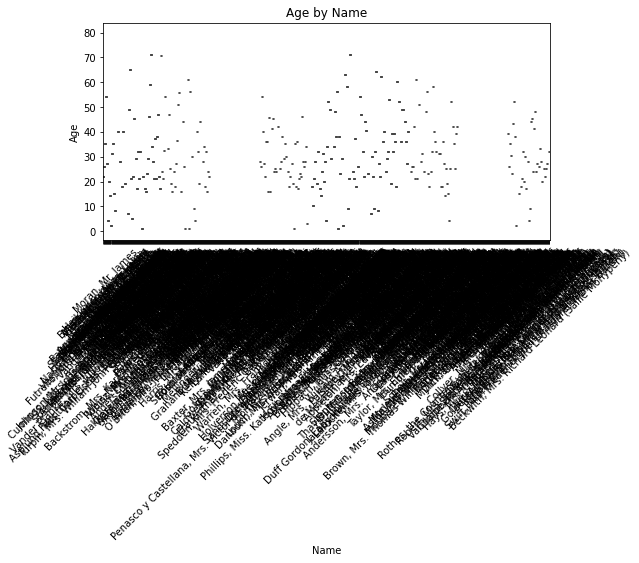

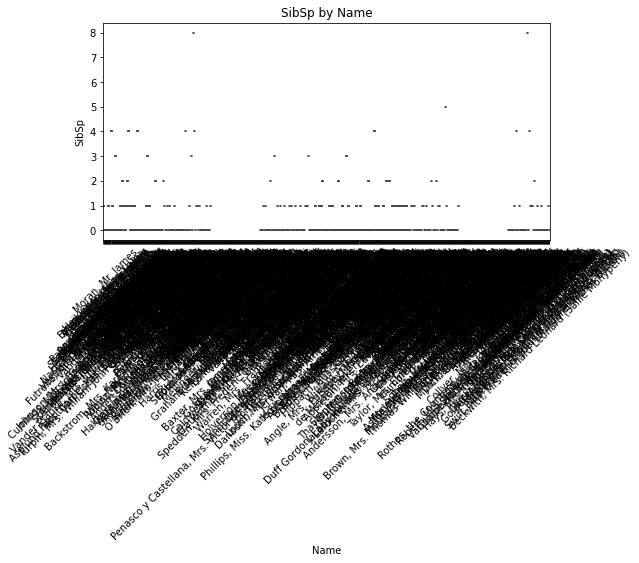

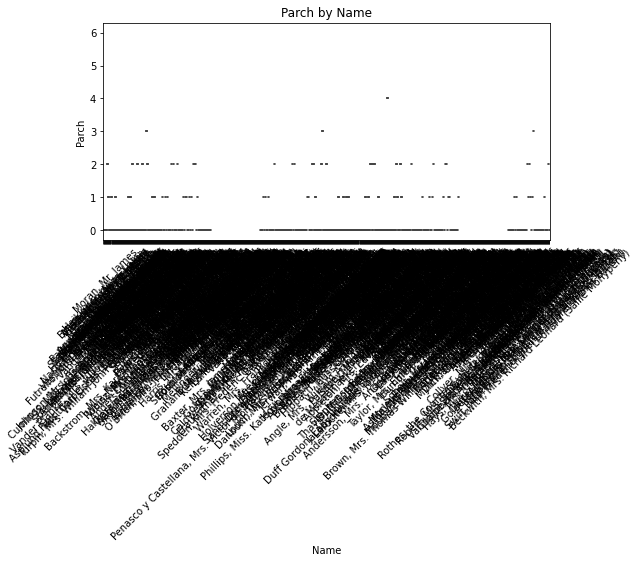

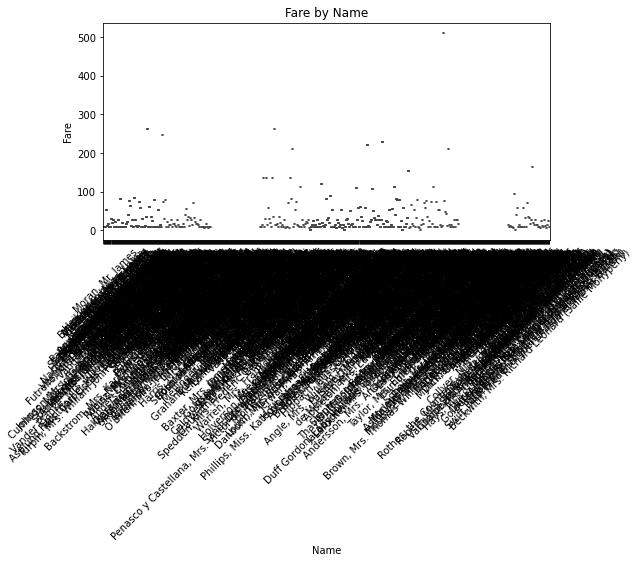

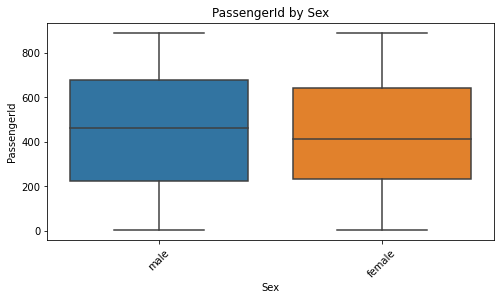

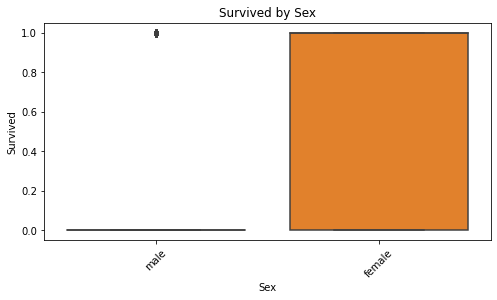

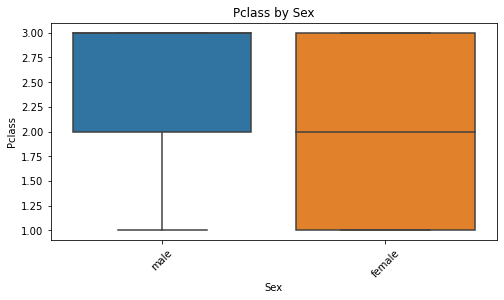

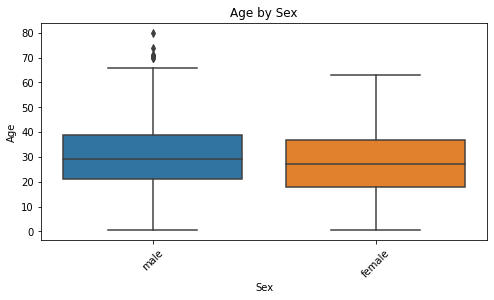

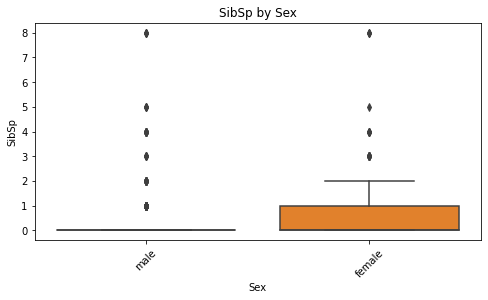

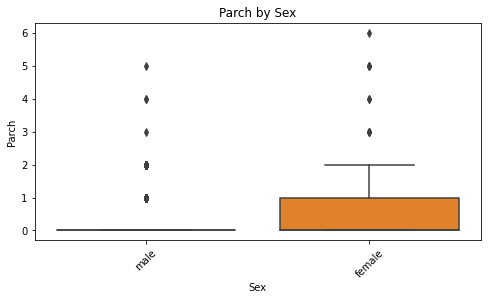

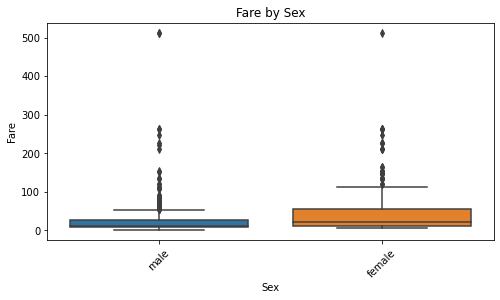

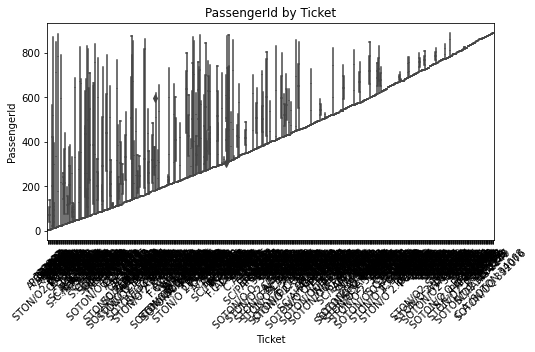

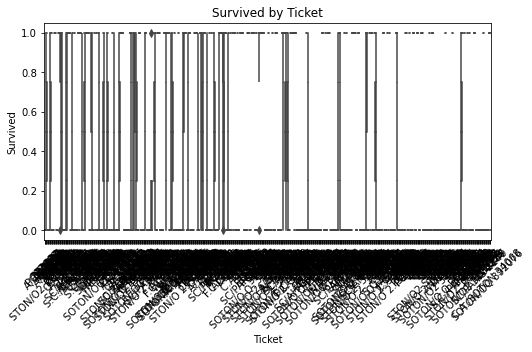

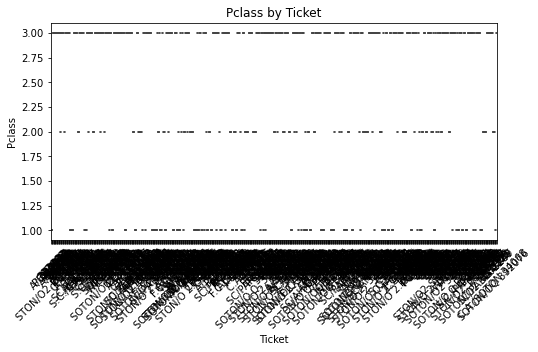

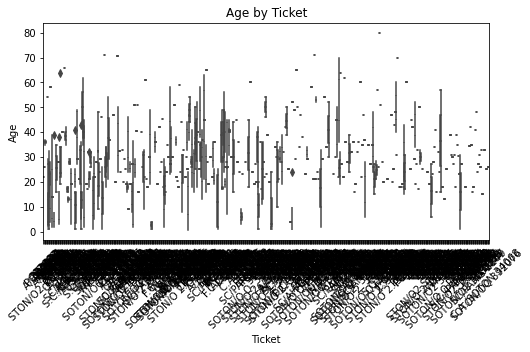

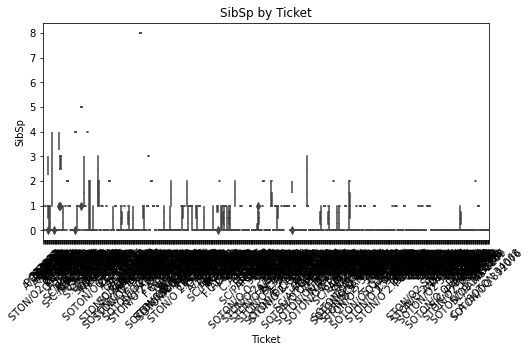

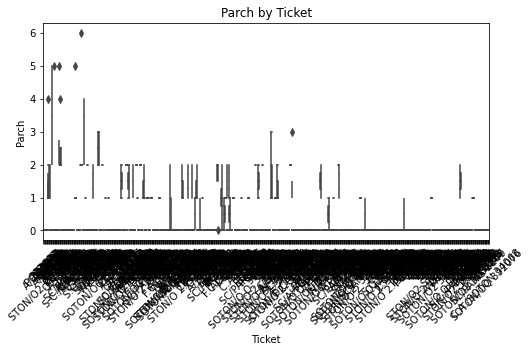

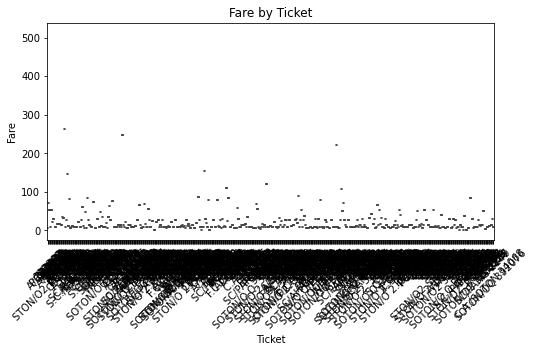

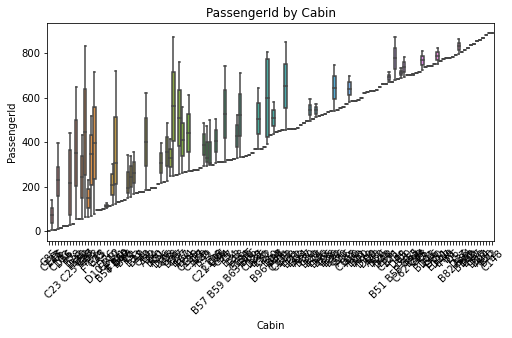

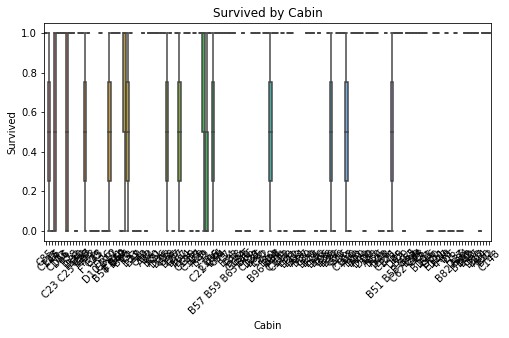

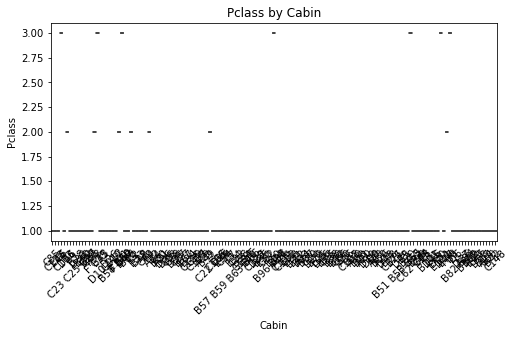

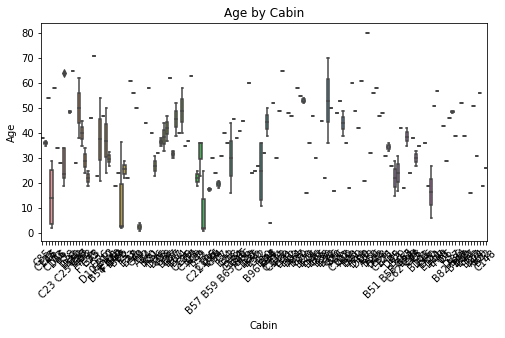

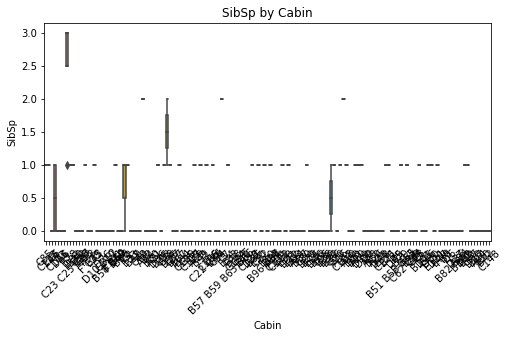

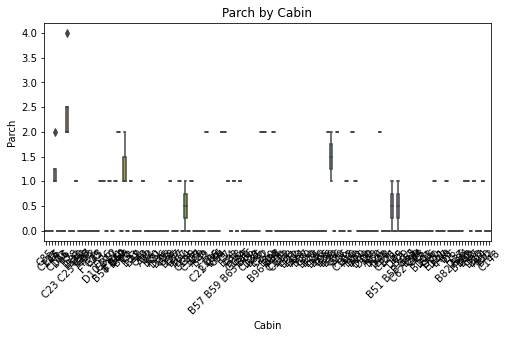

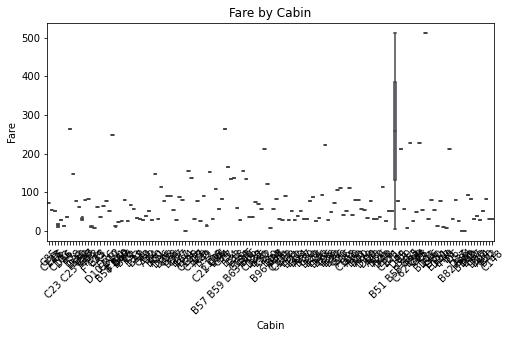

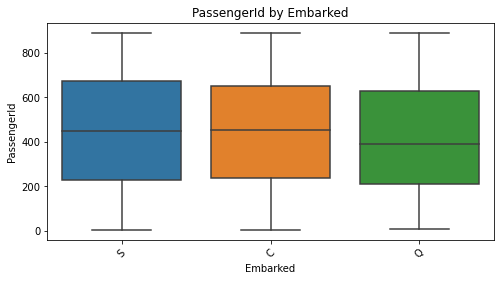

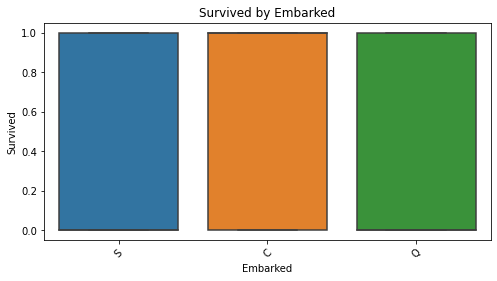

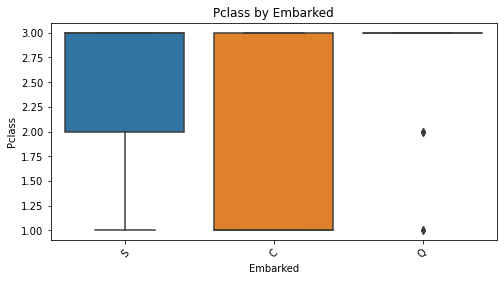

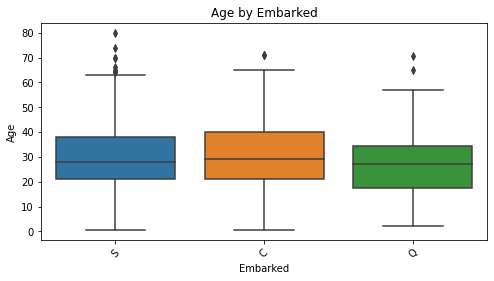

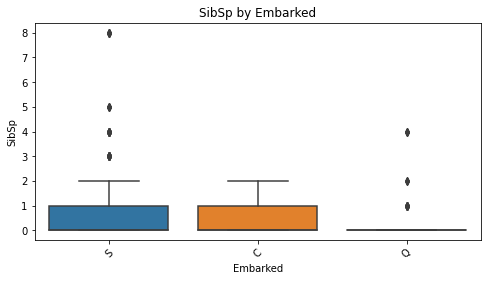

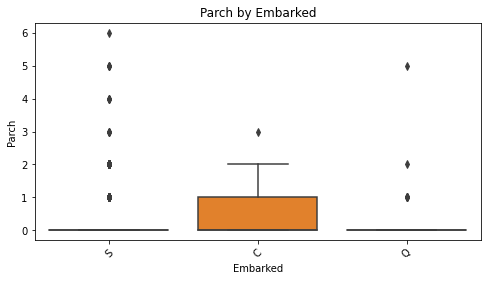

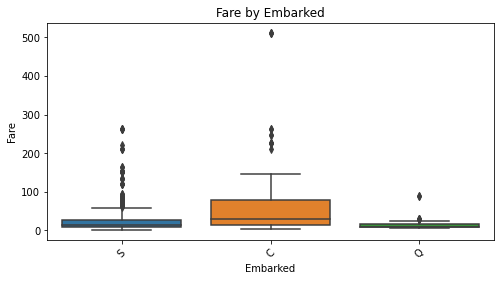

In [16]:
#Categorical vs Numerical (Box Plot)#

for cat_col in categorical_columns:
    for num_col in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()


In [ ]:
#Outlier Detection#

##Box Plot for Outliers##

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()


In [17]:
#Checking for Skewness#

skew_values = df[numeric_columns].skew()
print("Skewness of numerical features:\n", skew_values)


Skewness of numerical features:
 PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


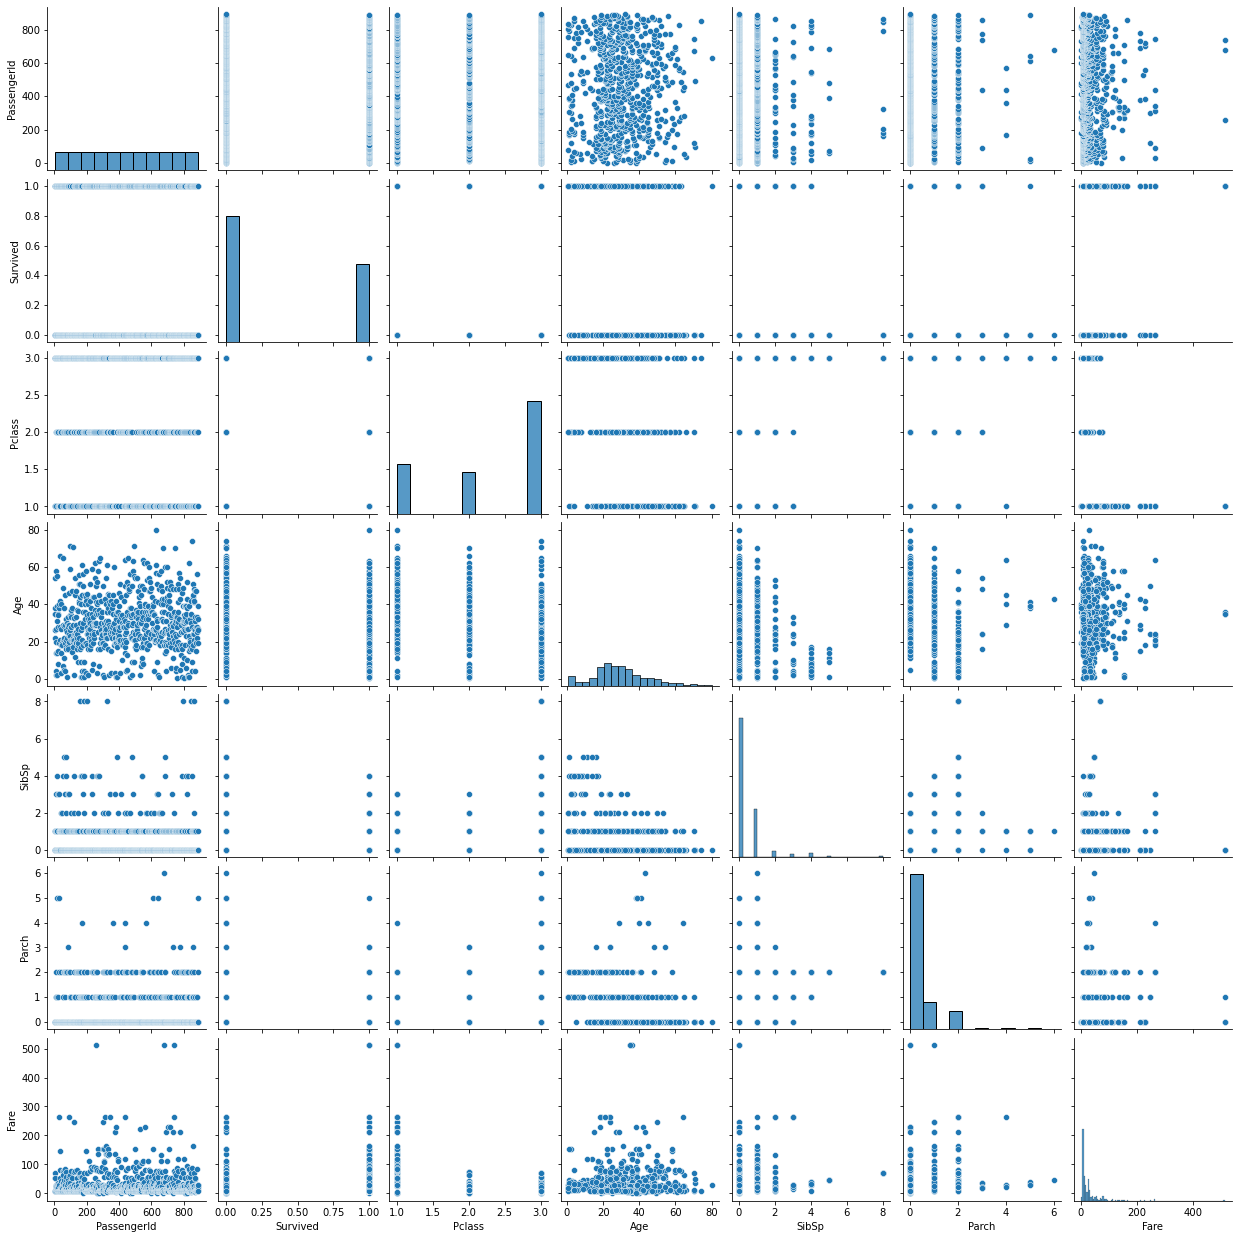

In [18]:
#Multivariate Analysis (Pair Plot)#
sns.pairplot(df[numeric_columns])
plt.show()
